# Image Compression Model(Lossy Compression)

In [1]:
#Import the important libraries
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

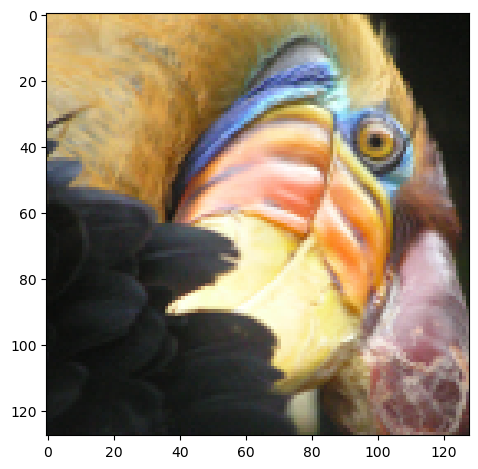

In [2]:
#Load the image
image1 = io.imread('images/bird_small.png')
io.imshow(image1)
io.show()

In [3]:
#The image that is seen above is of the shape (row,column,3), a 3-Dimentional Array. For application of K-means to perform
#image compression we need to convert this 3d representation to 2d representation (row*colum,3). Note, row*column will 
#the total number of pixels the image has. 3 in both the representations, stores the RGB values of the pixels. When k-mean
#will be applied on the 2d data, it will form clusters on the basis of the RGB of the pixels

#Dimension of the original image
rows = image1.shape[0]
cols = image1.shape[1]

#Flatten the image
image = image1.reshape(rows*cols, 3)

In [4]:
#3d representation
image1[0]

array([[219, 180, 103],
       [230, 185, 116],
       [226, 186, 110],
       [223, 185, 105],
       [225, 179, 103],
       [228, 187, 115],
       [228, 185, 111],
       [228, 187, 114],
       [225, 183, 107],
       [218, 172,  96],
       [221, 180, 102],
       [226, 187, 109],
       [222, 182,  99],
       [224, 184,  99],
       [231, 188, 100],
       [228, 182,  98],
       [222, 176,  95],
       [228, 187, 106],
       [231, 191, 103],
       [230, 182,  99],
       [224, 182, 100],
       [218, 186, 101],
       [221, 185, 107],
       [224, 184, 106],
       [224, 180, 102],
       [223, 182, 105],
       [222, 181,  99],
       [222, 175,  91],
       [223, 176,  97],
       [227, 183, 116],
       [224, 188, 122],
       [229, 193, 126],
       [227, 190, 119],
       [229, 189, 115],
       [239, 194, 113],
       [234, 192, 116],
       [227, 187, 105],
       [231, 192, 104],
       [230, 187, 108],
       [220, 183,  97],
       [225, 175,  88],
       [231, 178

In [5]:
#2d representation
image[0]

array([219, 180, 103], dtype=uint8)

In [6]:
#Implement k-means clustering to form k clusters
#When k-mean will be applied on the 2d data, it will form clusters on the basis of the RGB of the pixels irrespective 
#of which row and which coloum do they belong
kmeans = KMeans(n_clusters=16)
kmeans.fit(image)

KMeans(n_clusters=16)

Now I would like to draw your attention to 2 entities connected to K-mean scikit implementation.
1) model.cluster_centers_

2) model.labels_

In [7]:
#model.cluster_centers_: When K clusters are formed, K centroids are formed. This keywork stores these centroids.
centroids=kmeans.cluster_centers_
centroids

array([[118.22158273,  84.79280576,  46.18273381],
       [179.16363636, 160.75636364, 143.4169697 ],
       [ 21.62844473,  23.42793792,  20.82388343],
       [166.59492274, 121.18543046,  54.53200883],
       [249.14773777, 241.40166205, 208.78301016],
       [222.0006035 , 183.30114665, 116.68436934],
       [ 98.16728625, 116.05204461, 164.22304833],
       [ 42.33751493,  42.51314217,  40.4265233 ],
       [234.28997868, 145.88272921,  64.57995736],
       [245.85458167, 219.43326693, 161.50099602],
       [193.99351852, 155.63055556,  87.86296296],
       [ 73.54129353,  66.65174129,  66.1800995 ],
       [150.01567749, 128.13213886, 114.68980963],
       [211.04297521, 190.51900826, 188.09421488],
       [117.57849197,  99.17552534,  90.36341162],
       [144.57312253, 182.9486166 , 221.09881423]])

In [8]:
#model.labels_:Stores the index of centroids assigned to each datapoint
labels=kmeans.labels_
labels

array([5, 5, 5, ..., 7, 7, 7])

In [9]:
#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]

In [10]:
#Convert the compressed image array to unsigned 8-bit integer data type (uint8), ensuring values are between
#0 and 255 (valid for representing pixel intensities).
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

In [11]:
#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 3)

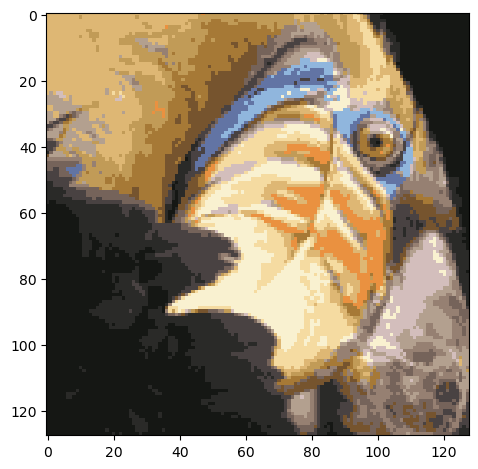

In [12]:
#Save and display output image
io.imsave('compressed_image_64.png', compressed_image)
io.imshow(compressed_image)
io.show()